# Scaling Exercises
Do your work for these exercises in a jupyter notebook named ```scaling```. Use the zillow dataset you ```acquired``` and ```prepped``` in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

import seaborn as sns
import matplotlib.pyplot as plt
# Only works inside notebook
%matplotlib inline 

import QMCBT_wrangle as w
import QMCBT_explore_evaluate as ee
from env import user, password, host

import warnings
warnings.filterwarnings("ignore")

In [2]:
# use custom wrangle function to automate Acquire and Prepare
df = w.wrangle_zillow()

In [3]:
df.head().T

,4,6,7,11,14
bedroomcnt,4,3,3,0,0
bathroomcnt,2.0,4.0,2.0,0.0,0.0
calculatedfinishedsquarefeet,3633,1620,2077,1200,171
taxvaluedollarcnt,296425,847770,646760,5328,6920
yearbuilt,2005,2011,1926,1972,1973
taxamount,6941.39,10244.94,7924.68,91.6,255.17
fips,6037,6037,6037,6037,6037


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2140235 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    Int64  
 1   bathroomcnt                   Float64
 2   calculatedfinishedsquarefeet  Int64  
 3   taxvaluedollarcnt             Int64  
 4   yearbuilt                     Int64  
 5   taxamount                     Float64
 6   fips                          Int64  
dtypes: Float64(2), Int64(5)
memory usage: 144.9 MB


In [5]:
df.isnull().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
dtype: int64

### 1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

<AxesSubplot:xlabel='fips'>

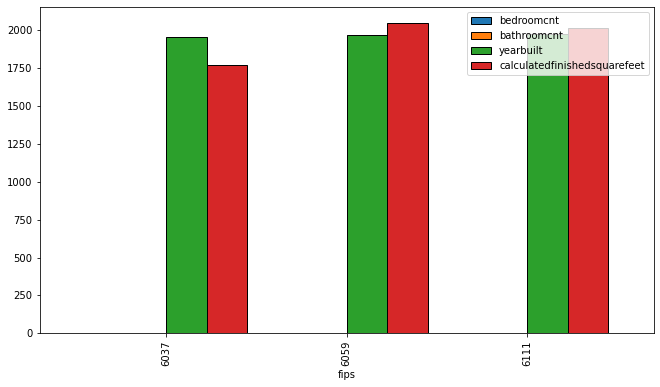

In [6]:
# Unscaled Distribution
df[['bedroomcnt', 'bathroomcnt', 'yearbuilt', 'calculatedfinishedsquarefeet', 'fips']].groupby('fips').mean().plot.bar(figsize=(11, 6), ec='black', width=.9)

In [7]:
df.T

,4,6,7,11,14,15,18,19,20,21,...,2152850,2152851,2152852,2152853,2152855,2152856,2152858,2152859,2152861,2152862
bedroomcnt,4,3,3,0,0,0,3,3,3,4,...,3,3,3,4,3,4,4,4,3,4
bathroomcnt,2.0,4.0,2.0,0.0,0.0,0.0,1.0,2.0,2.0,4.0,...,2.5,3.5,2.0,2.0,2.5,4.0,3.0,4.5,2.5,4.0
calculatedfinishedsquarefeet,3633,1620,2077,1200,171,203,1244,1300,1222,4144,...,2033,1980,1917,1987,1809,4375,2262,3127,1974,2110
taxvaluedollarcnt,296425,847770,646760,5328,6920,14166,169471,233266,290492,1303522,...,641757,773358,408680,259913,405547,422400,960756,536061,424353,554009
yearbuilt,2005,2011,1926,1972,1973,1960,1950,1950,1951,2016,...,2015,2014,1946,1955,2012,2015,2015,2014,2015,2014
taxamount,6941.39,10244.94,7924.68,91.6,255.17,163.79,2532.88,3110.99,3870.25,14820.1,...,10009.46,8347.9,4341.32,3175.66,4181.1,13877.56,13494.52,6244.16,5302.7,6761.2
fips,6037,6037,6037,6037,6037,6037,6037,6037,6037,6037,...,6059,6059,6111,6059,6059,6037,6059,6059,6059,6037


<div class="alert alert-info">

#### Observations:
* You can't even see bedroom and bathroom because their scale is so small in comparison to sqft
    
</div>

<AxesSubplot:xlabel='fips'>

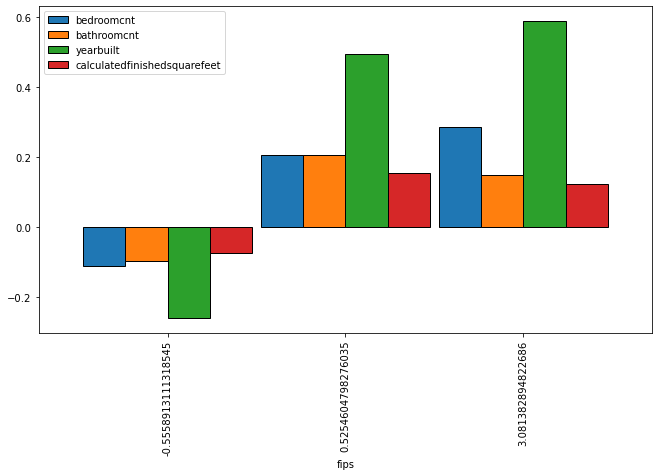

In [8]:
# Scaled Distribution
std_scaler_df = df

cols = ['bedroomcnt', 'bathroomcnt', 'yearbuilt', 'calculatedfinishedsquarefeet', 'fips']
scaler = StandardScaler()
std_scaler_df[cols] = scaler.fit_transform(std_scaler_df[cols])
std_scaler_df[cols].groupby('fips').mean().plot.bar(figsize=(11, 6), ec='black', width=.95)

In [9]:
std_scaler_df.T

,4,6,7,11,14,15,18,19,20,21,...,2152850,2152851,2152852,2152853,2152855,2152856,2152858,2152859,2152861,2152862
bedroomcnt,0.749068,-0.323203,-0.323203,-3.540018,-3.540018,-3.540018,-0.323203,-0.323203,-0.323203,0.749068,...,-0.323203,-0.323203,-0.323203,0.749068,-0.323203,0.749068,0.749068,0.749068,-0.323203,0.749068
bathroomcnt,-0.242646,1.776437,-0.242646,-2.261729,-2.261729,-2.261729,-1.252187,-0.242646,-0.242646,1.776437,...,0.262125,1.271666,-0.242646,-0.242646,0.262125,1.776437,0.766896,2.281208,0.262125,1.776437
calculatedfinishedsquarefeet,1.448578,-0.199053,0.174999,-0.542821,-1.385053,-1.358861,-0.506807,-0.460972,-0.524814,1.866829,...,0.138985,0.095605,0.04404,0.101335,-0.044358,2.055902,0.326421,1.034419,0.090694,0.20201
taxvaluedollarcnt,296425,847770,646760,5328,6920,14166,169471,233266,290492,1303522,...,641757,773358,408680,259913,405547,422400,960756,536061,424353,554009
yearbuilt,1.987871,2.258745,-1.57863,0.498067,0.543212,-0.04368,-0.495136,-0.495136,-0.449991,2.484473,...,2.439327,2.394182,-0.675719,-0.269408,2.30389,2.439327,2.439327,2.394182,2.439327,2.394182
taxamount,6941.39,10244.94,7924.68,91.6,255.17,163.79,2532.88,3110.99,3870.25,14820.1,...,10009.46,8347.9,4341.32,3175.66,4181.1,13877.56,13494.52,6244.16,5302.7,6761.2
fips,-0.555891,-0.555891,-0.555891,-0.555891,-0.555891,-0.555891,-0.555891,-0.555891,-0.555891,-0.555891,...,0.52546,0.52546,3.081383,0.52546,0.52546,-0.555891,0.52546,0.52546,0.52546,-0.555891


Text(0, 0.5, 'Count')

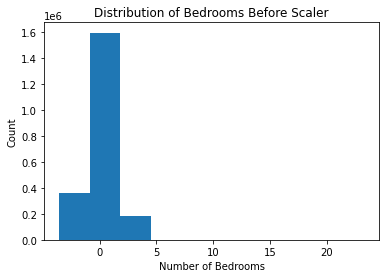

In [10]:
plt.hist(df.bedroomcnt)
plt.title('Distribution of Bedrooms Before Scaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

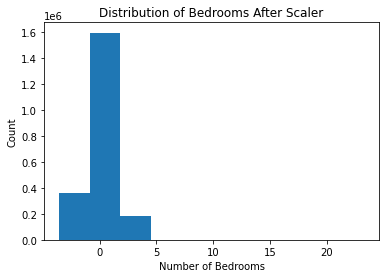

In [11]:
plt.hist(std_scaler_df.bedroomcnt)
plt.title('Distribution of Bedrooms After Scaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

<div class="alert alert-info">

#### Observations:
* You can definately see the bedroom and bathroom percentages now
* The variances in yearbuilt and sqft are much more visible now 
* The FIPS on the left is more than likely associated with a historical district based on the older year built and lower ratio of bed and bath in relation to the other two FIPS
    
</div>

In [12]:
# Function Stolen from Codeup Instructor Andrew King
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    """
    This Function takes input arguments, 
    creates a copy of the df argument, 
    scales it according to the scaler argument, 
    then displays subplots of the columns_to_scale argument 
    before and after scaling and then returns the copy df as df_scaled
    """    
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
    #return df_scaled.head().T
    #return fig, axs

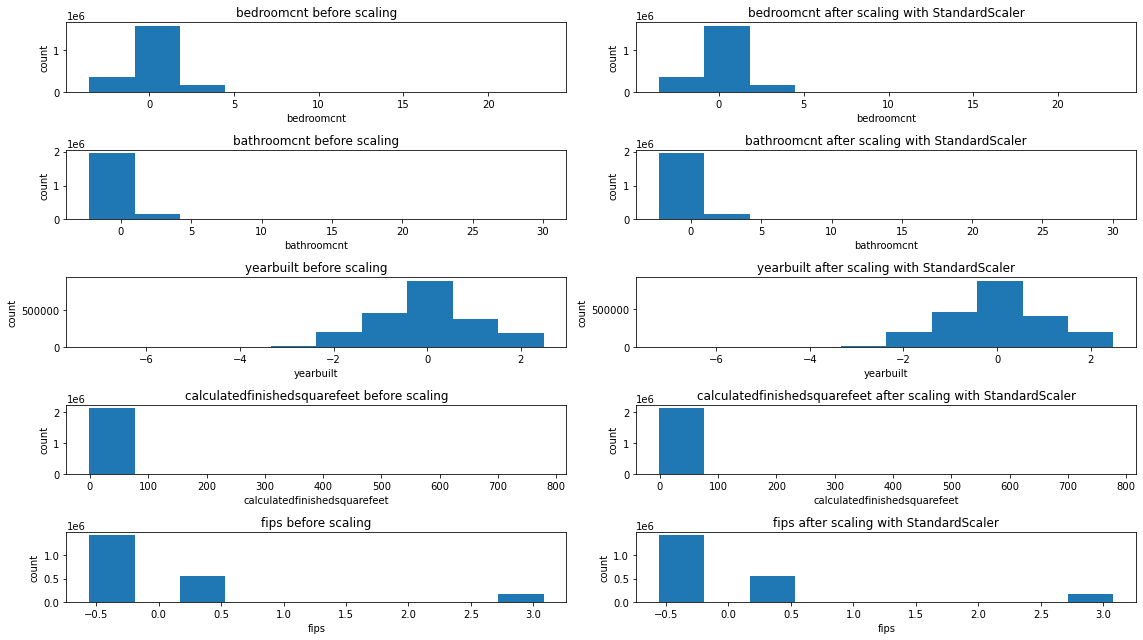

In [13]:
# StandardScaler
scaler = StandardScaler()
columns_to_scale = ['bedroomcnt', 'bathroomcnt', 'yearbuilt', 'calculatedfinishedsquarefeet', 'fips']

visualize_scaler(scaler, df, columns_to_scale, bins=10)

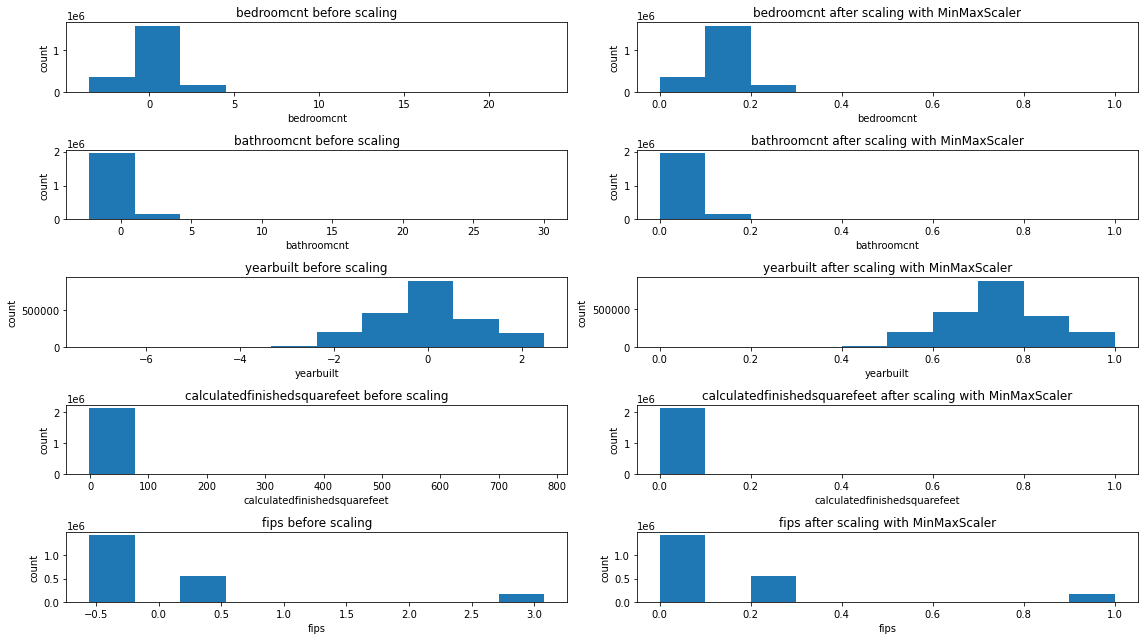

In [14]:
# MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = ['bedroomcnt', 'bathroomcnt', 'yearbuilt', 'calculatedfinishedsquarefeet', 'fips']

visualize_scaler(scaler, df, columns_to_scale, bins=10)

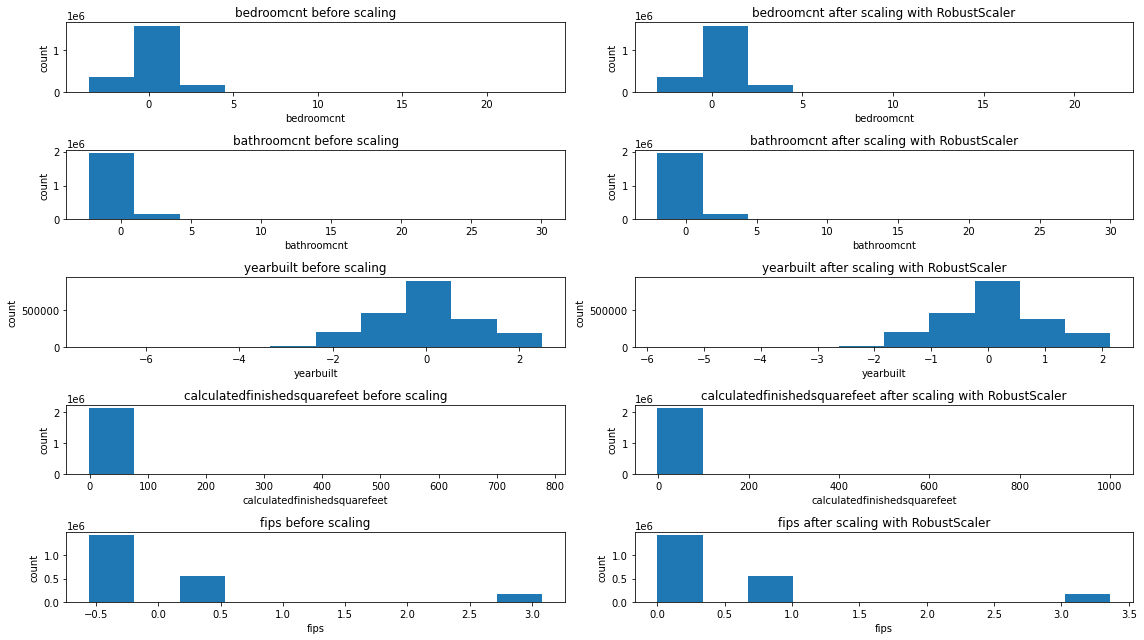

In [15]:
# RobustScaler
scaler = RobustScaler()
columns_to_scale = ['bedroomcnt', 'bathroomcnt', 'yearbuilt', 'calculatedfinishedsquarefeet', 'fips']

visualize_scaler(scaler, df, columns_to_scale, bins=10)

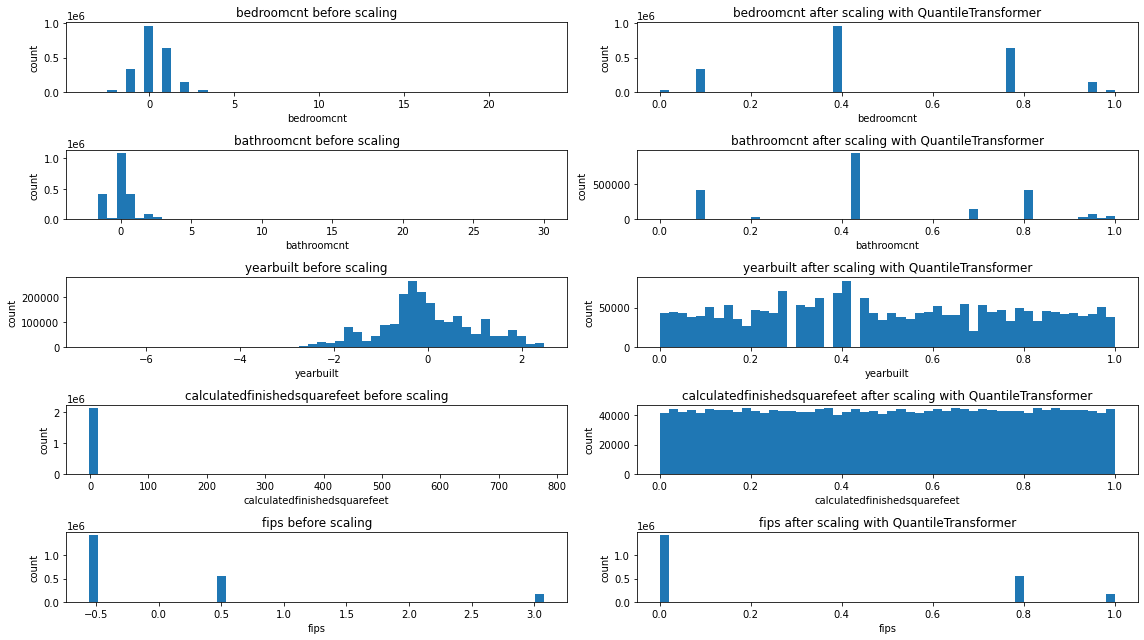

In [16]:
# QuantileTransformer
scaler = QuantileTransformer()
columns_to_scale = ['bedroomcnt', 'bathroomcnt', 'yearbuilt', 'calculatedfinishedsquarefeet', 'fips']

visualize_scaler(scaler, df, columns_to_scale, bins=50)

<div class="alert alert-info">

#### Observations:
* Because the data is continuous, three of the scalers (MinMaxScaler, StandardScaler, RobustScaler) graph the same as the original with the exception of course... that they run on a shorter variance of scale along the x axis.
* The fourth scaler (QuantileTransformer) does not graph well because it attempts to evenly distribute the data.
    
</div>    

### 2. Apply the ```.inverse_transform``` method to your scaled data. Is the resulting dataset the exact same as the original data?

<div class="alert alert-success">

#### ANSWER:
* Yes, the ```.inverse_transform``` reverts the scaled data back to its original values
    
</div>

In [17]:
scaler = MinMaxScaler()
original_data = df[['taxvaluedollarcnt']]
scaled_data = scaler.fit_transform(original_data)

In [18]:
scaled_data[:5]

array([[3.28648550e-03],
       [9.39974125e-03],
       [7.17096337e-03],
       [5.88323736e-05],
       [7.64843033e-05]])

In [19]:
original_data.head()

,taxvaluedollarcnt
4,296425
6,847770
7,646760
11,5328
14,6920


In [20]:
scaler.inverse_transform(scaled_data)[:5]

array([[296425.],
       [847770.],
       [646760.],
       [  5328.],
       [  6920.]])

### 3. Read the documentation for sklearn's ```QuantileTransformer```. Use ```normal``` for the ```output_distribution``` and apply this scaler to your data. Visualize the result of your data scaling.

In [21]:
QuantileTransformer?

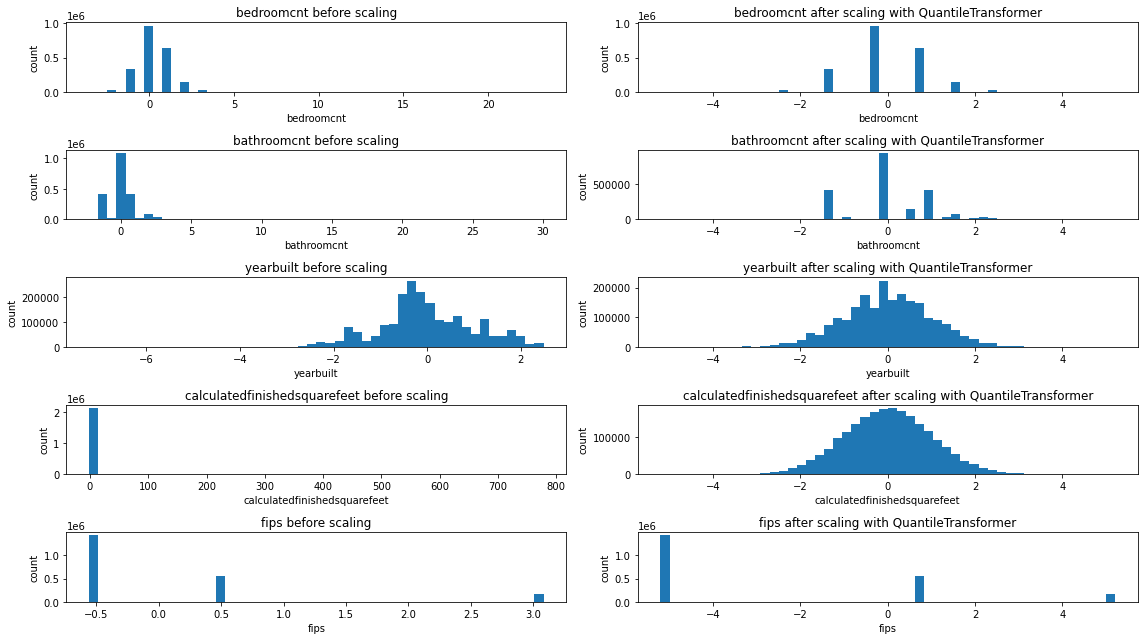

In [22]:
# QuantileTransformer
scaler = QuantileTransformer(output_distribution='normal')
columns_to_scale = ['bedroomcnt', 'bathroomcnt', 'yearbuilt', 'calculatedfinishedsquarefeet', 'fips']

visualize_scaler(scaler, df, columns_to_scale, bins=50)

<div class="alert alert-info">

#### Observations:

* Using a normal distribution keeps the scaler from trying to evenly distribute the data as much and you can see a bell curve instead of a filled block. 
    
</div>

### 4. Use the ```QuantileTransformer```, but omit the output_distribution argument. Visualize your results. What do you notice?

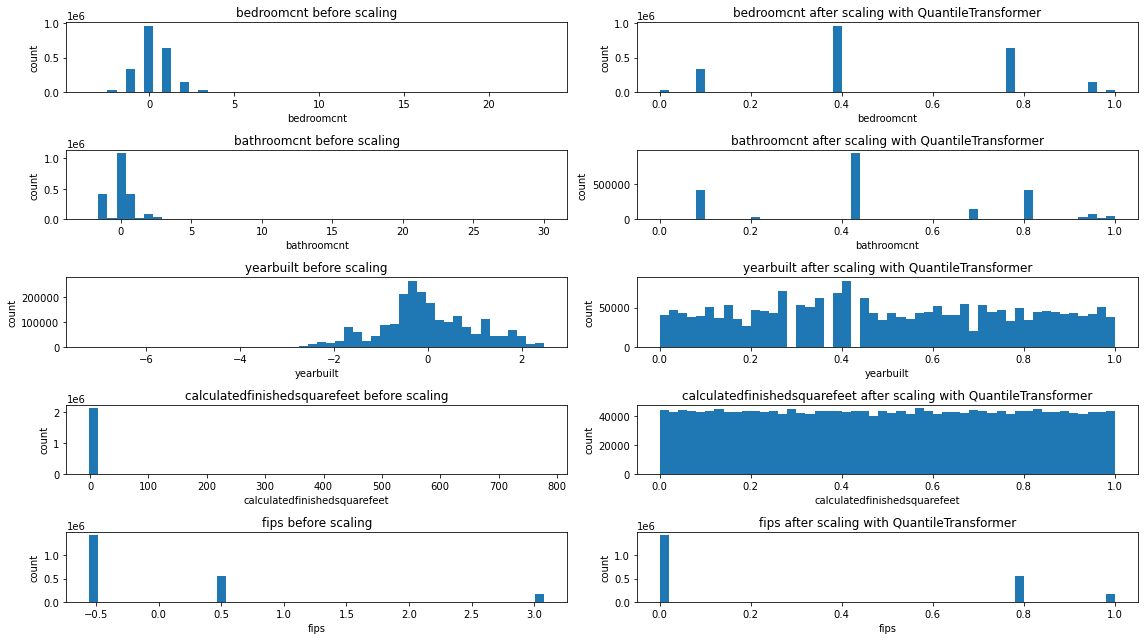

In [23]:
# QuantileTransformer
scaler = QuantileTransformer()
columns_to_scale = ['bedroomcnt', 'bathroomcnt', 'yearbuilt', 'calculatedfinishedsquarefeet', 'fips']

visualize_scaler(scaler, df, columns_to_scale, bins=50)

<div class="alert alert-info">

#### Observations:

* QuantileTransformer does not graph well eithout normal distribution because it attempts to evenly distribute the data.
    
</div>

### 5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your ```prepare.py``` that accepts as input the ```train```, ```validate```, and ```test``` data splits, and returns the ```scaled``` versions of each. Be sure to only learn the parameters for scaling from your training data!